In [1]:
import numpy as np

from src import exam_func, synthesize_rel_mat
from src.evaluator import validate_pi
from src.optimizers.ot_nsw import compute_pi_ot_nsw
from src.optimizers.pgd_nsw import compute_pi_pgd_nsw

In [2]:
# データ生成

# パラメータ
n_query = 1000
n_doc = 5
n_rank = 5
random_state = 88

# ランダムな関連度行列を生成
rel_mat_true, rel_mat_obs = synthesize_rel_mat(n_query, n_doc, random_state=random_state)

# 露出関数
expo = exam_func(n_rank)

## 提案手法

  7%|▋         | 7/100 [00:00<00:00, 380.31it/s]


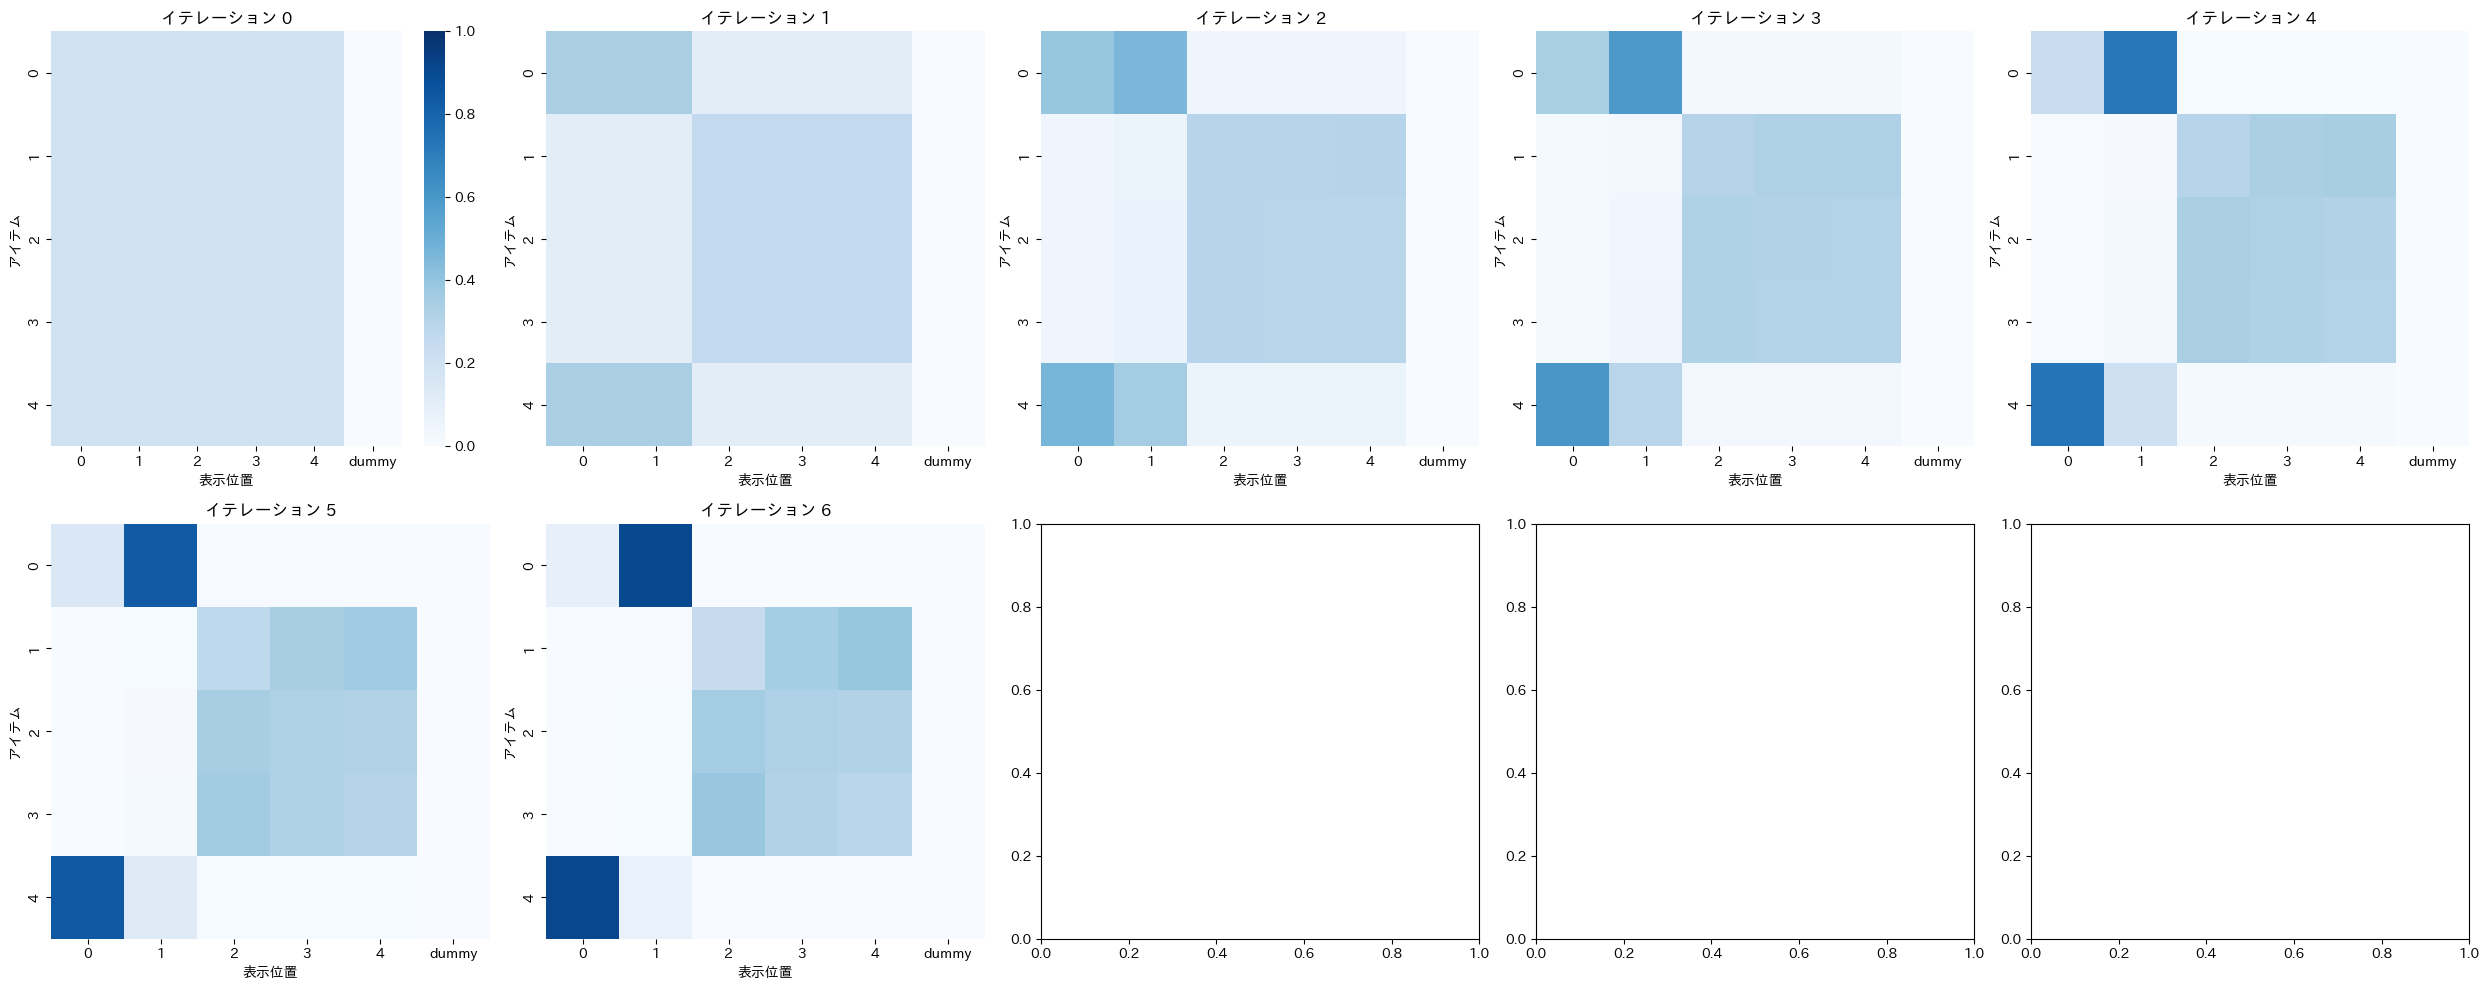

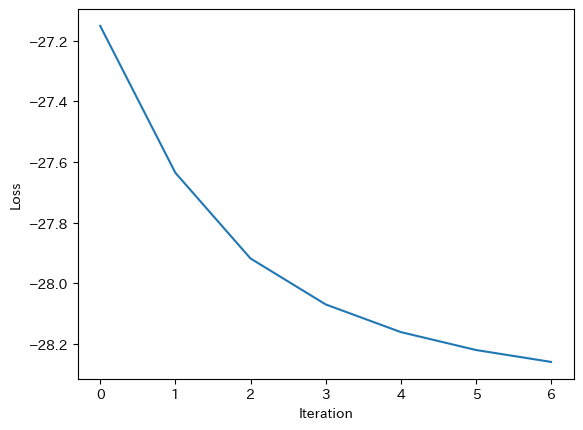

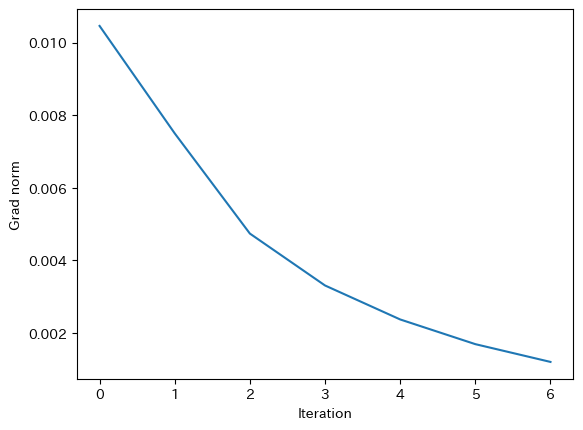

In [4]:
high = np.ones(n_doc)
pi_ot_nsw, history_ot_nsw = compute_pi_ot_nsw(
    rel_mat_true,
    expo,
    high,
    alpha=0,
    eps=1,
    max_iter=100,
    lr=0.5,
    ot_n_iter=20,
    tol=0.001,
    device="cuda",
    use_amp=False,
    pi_stock_size=50,
)

# 結果を可視化
history_ot_nsw.plot_pi_by_iteration()
history_ot_nsw.plot_loss_curve()
history_ot_nsw.plot_grad_norm_curve()

# piが制約条件を満たしているか確認
validate_pi(pi_ot_nsw)

## 射影勾配法: X = SA(X)の更新を繰り返したときのXを可視化する

X = SA(X)という更新を繰り返したときのXを可視化する

Xは費用行列のため、XとSA(X)の大小関係は逆になる傾向があるはず
そのため、X = SA(X)の更新を繰り返しても、Xは振動して収束しないはず

100%|██████████| 100/100 [00:00<00:00, 1525.88it/s]


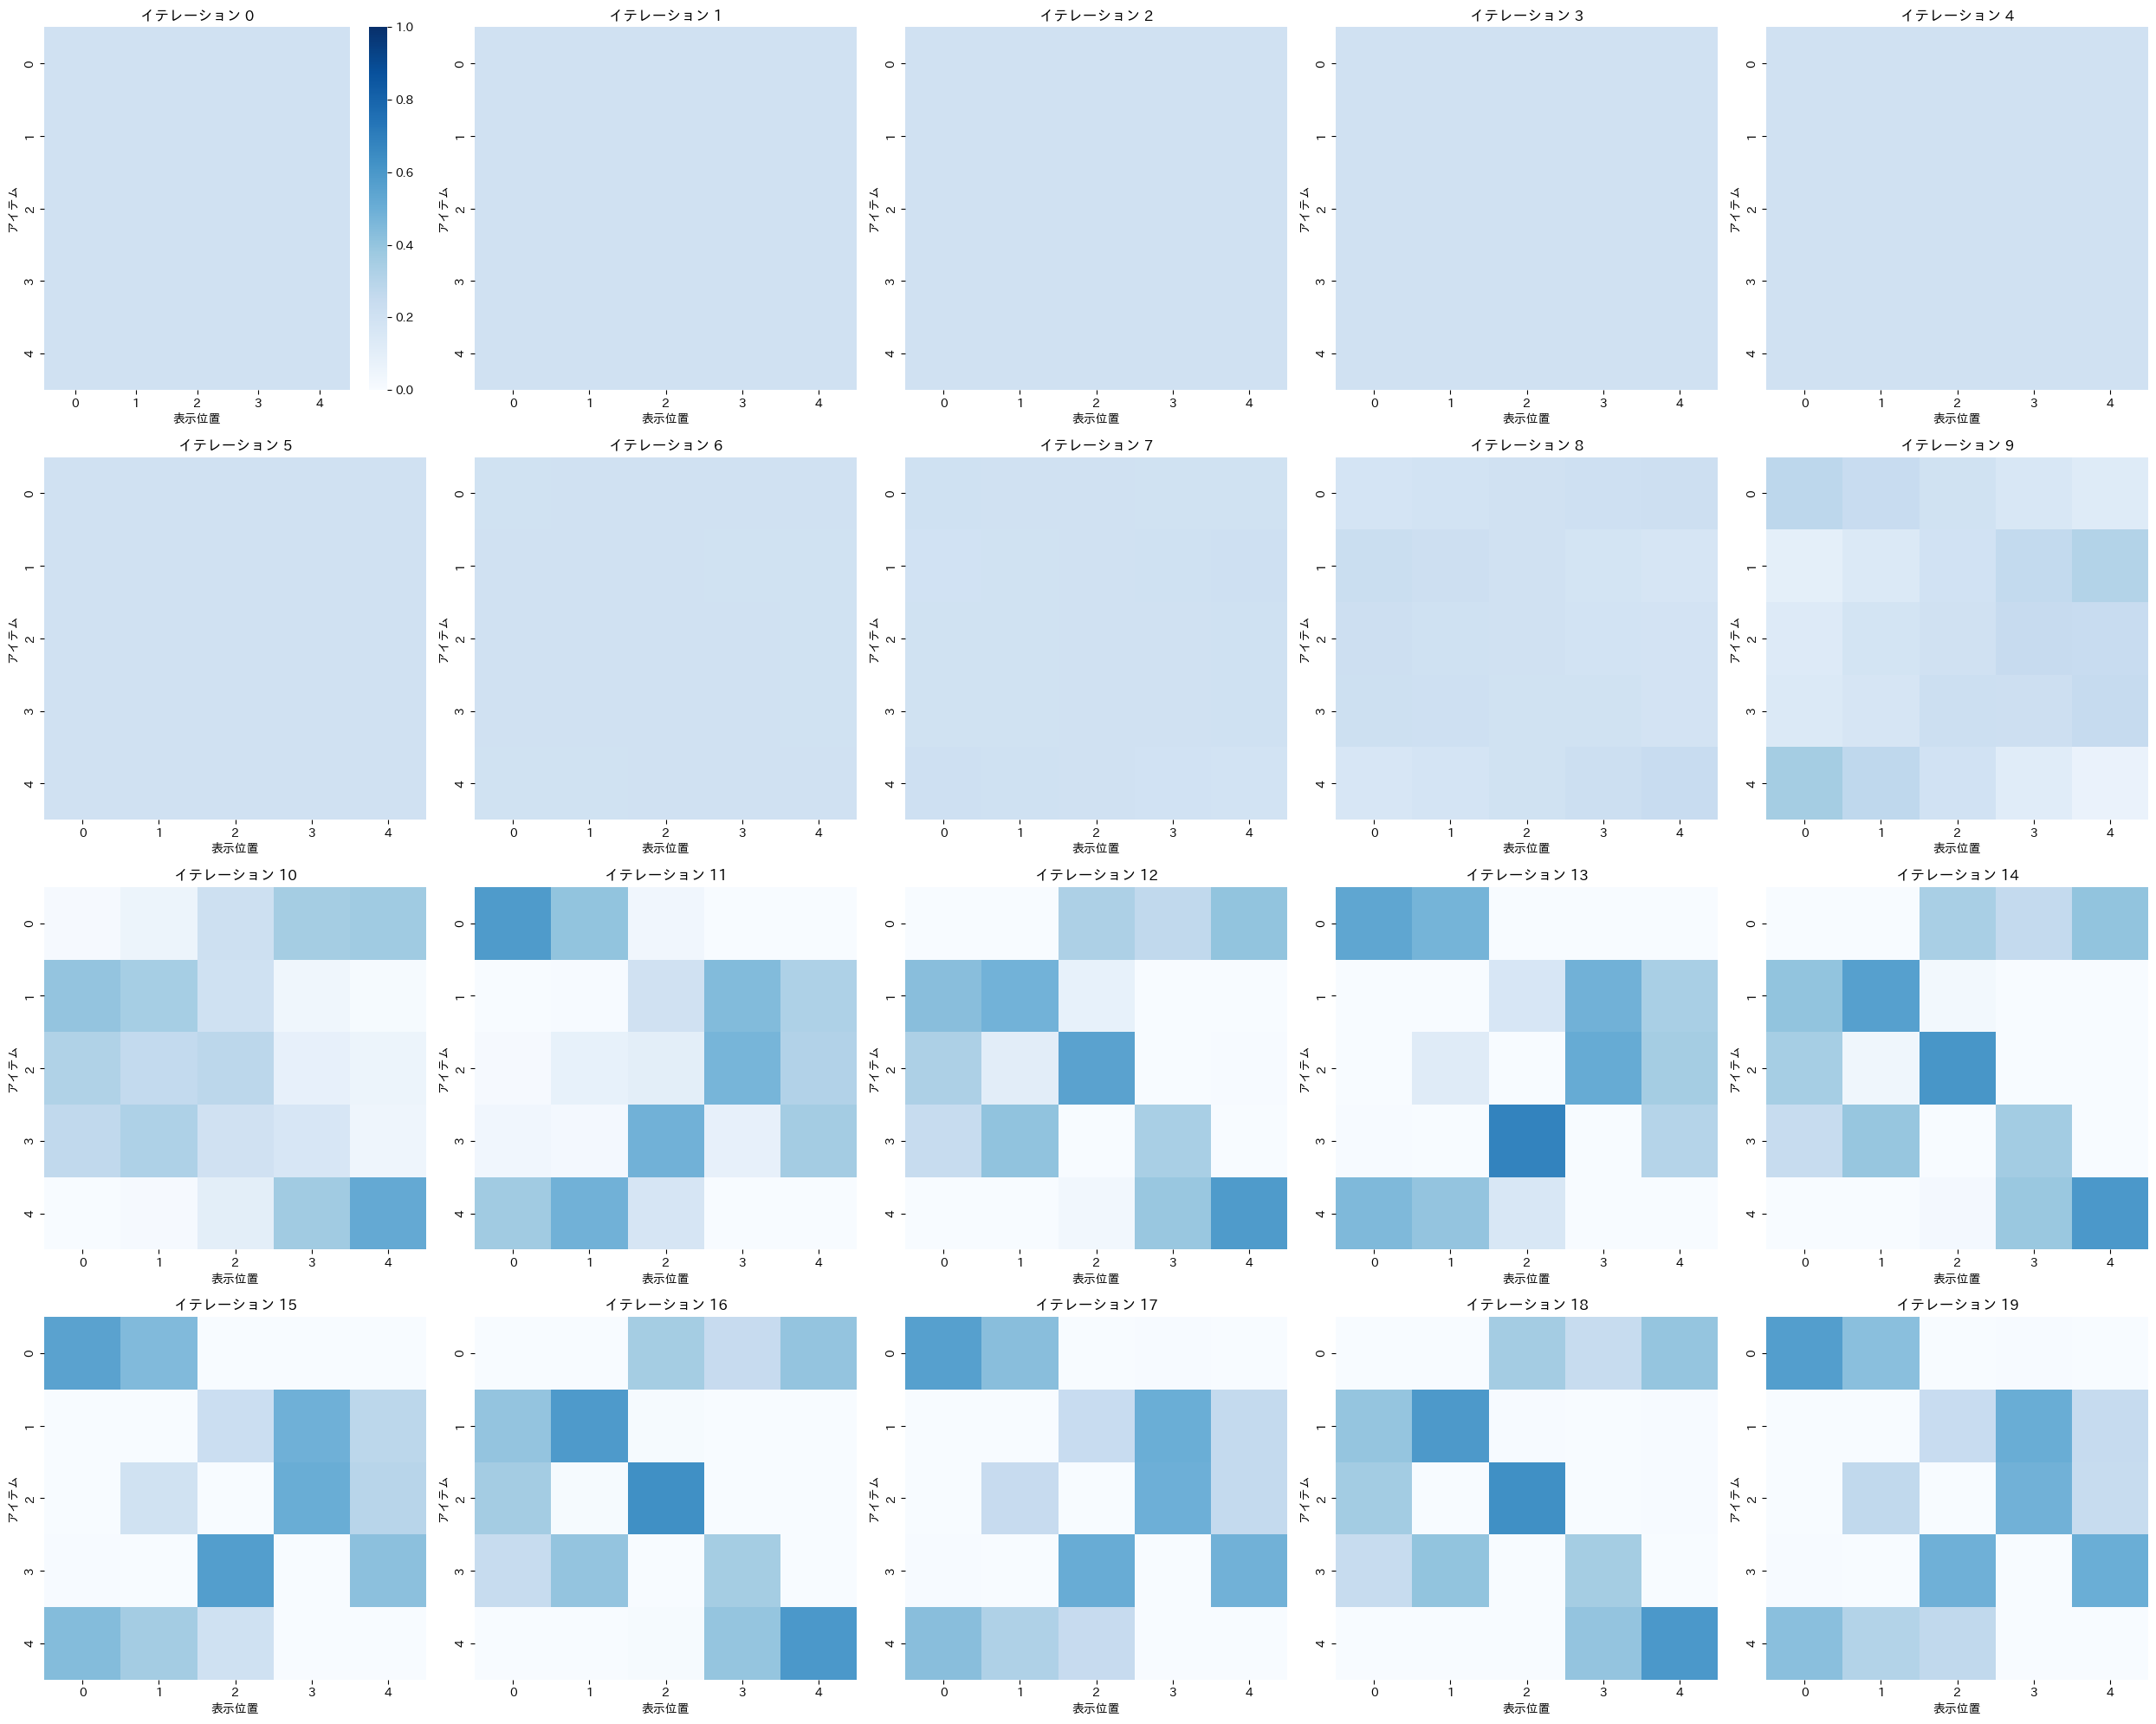

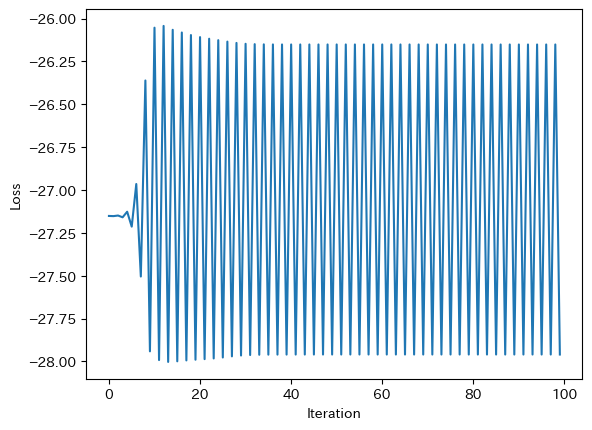

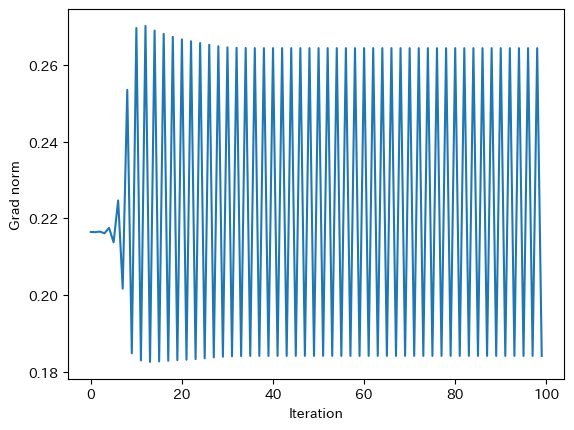

In [5]:
high = np.ones(n_doc)
pi_pg_ot_nsw, history_pg_ot_nsw = compute_pi_pgd_nsw(
    rel_mat_true,
    expo,
    high,
    alpha=0,
    apply_negative_to_X_bf_sa=False,
    eps=0.05,
    max_iter=100,
    lr=0.5,
    ot_n_iter=10,
    tol=0.01,
    device="cuda",
    use_amp=False,
    pi_stock_size=20,
)

# 結果を可視化
history_pg_ot_nsw.plot_pi_by_iteration(plot_dummy=False)
history_pg_ot_nsw.plot_loss_curve()
history_pg_ot_nsw.plot_grad_norm_curve()

# piが制約条件を満たしているか確認
validate_pi(pi_pg_ot_nsw)

## 射影勾配法: X = SA(-X)の更新を繰り返したときのXを可視化する

更新を繰り返したときの振動を避けるため、X = SA(-X)の更新を繰り返す 

100%|██████████| 100/100 [00:00<00:00, 1610.88it/s]


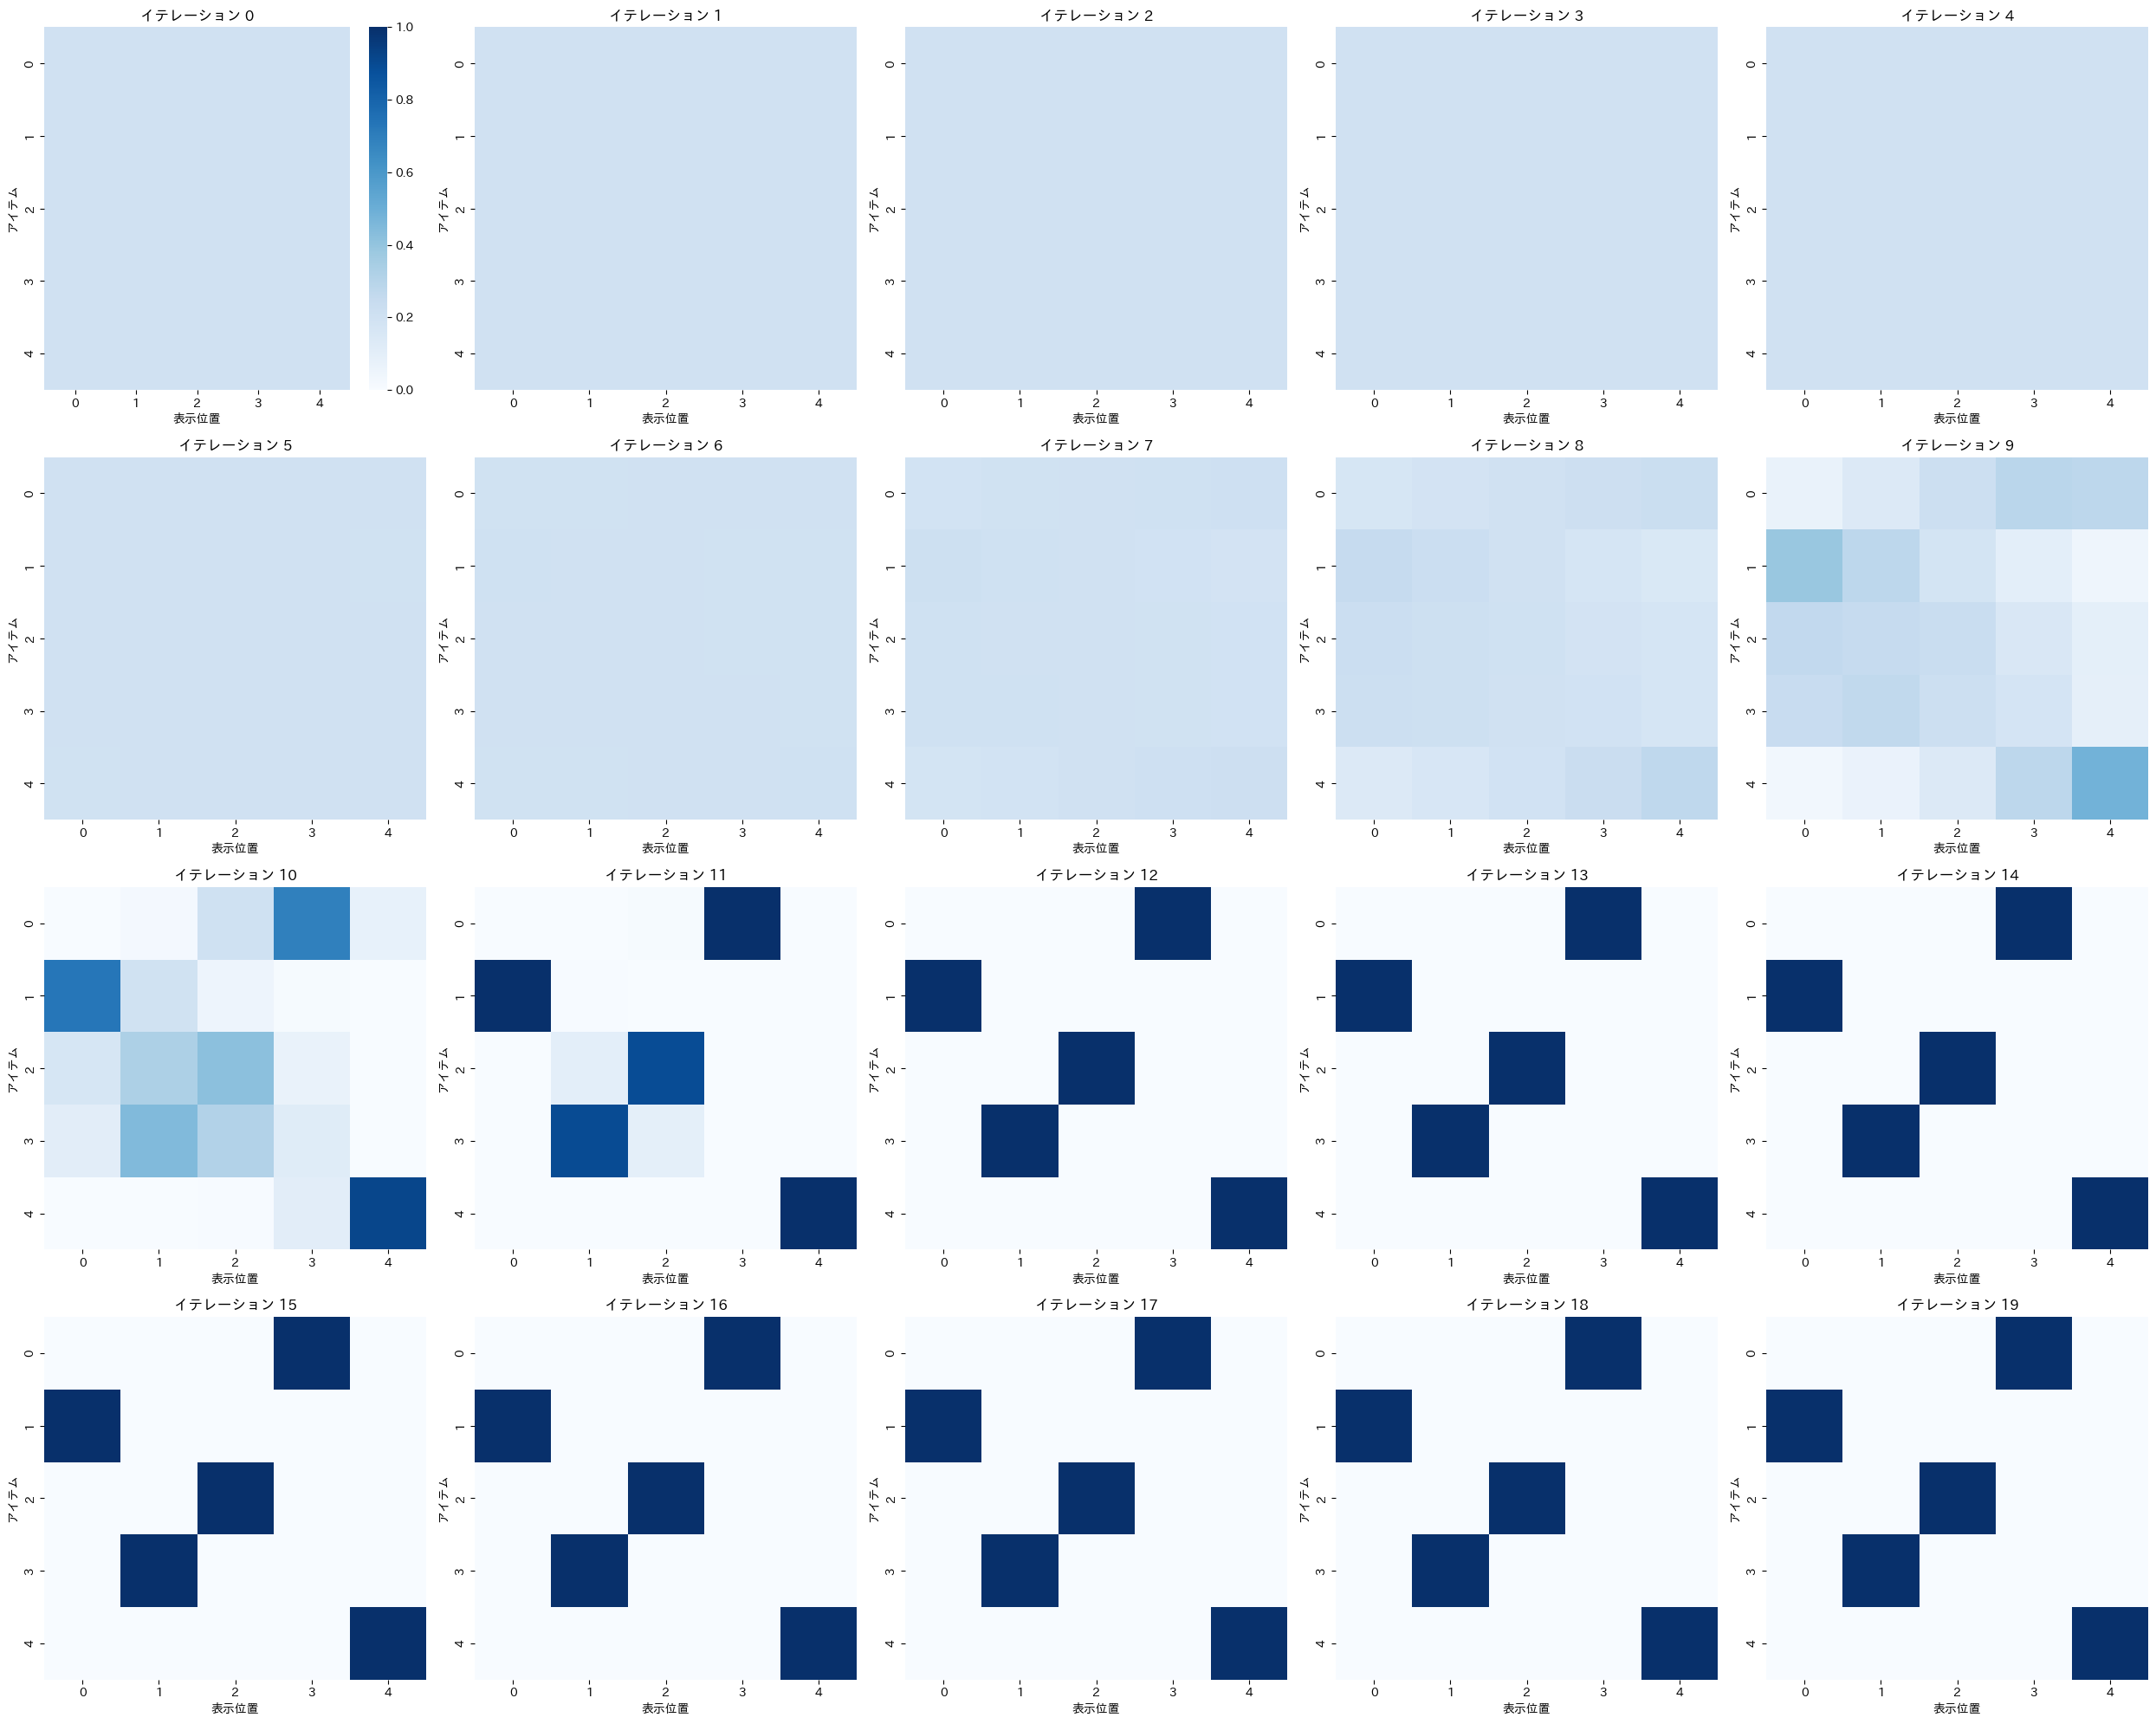

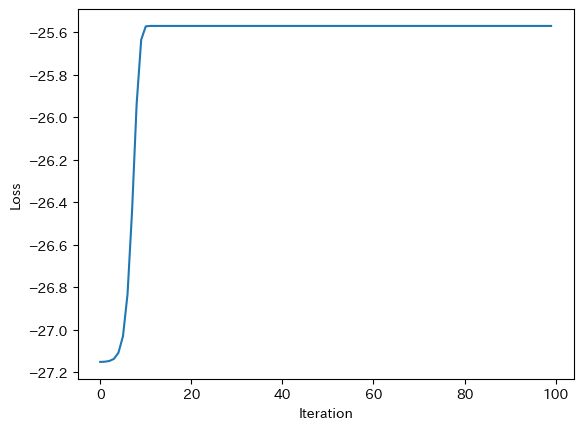

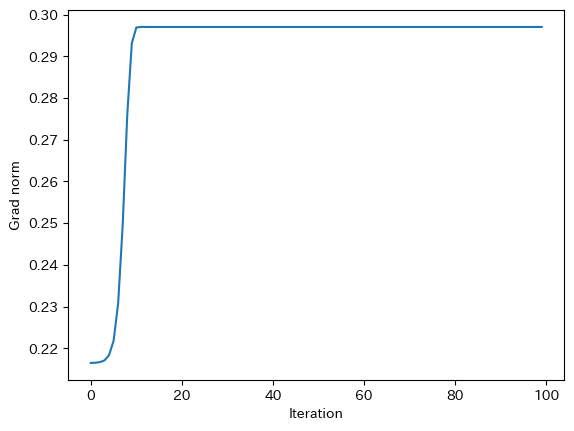

In [6]:
high = np.ones(n_doc)
pi_pg_ot_nsw, history_pg_ot_nsw = compute_pi_pgd_nsw(
    rel_mat_true,
    expo,
    high,
    alpha=0,
    apply_negative_to_X_bf_sa=True,
    eps=0.05,
    max_iter=100,
    lr=0.5,
    ot_n_iter=10,
    tol=0.01,
    device="cuda",
    use_amp=False,
    pi_stock_size=20,
)

# 結果を可視化
history_pg_ot_nsw.plot_pi_by_iteration(plot_dummy=False)
history_pg_ot_nsw.plot_loss_curve()
history_pg_ot_nsw.plot_grad_norm_curve()

# piが制約条件を満たしているか確認
validate_pi(pi_pg_ot_nsw)